In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Compare the following drugs
drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','x','d','^']
colors=['green','red','black','blue']

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data=pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data=pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
clinical_drug_trial_df=pd.merge(clinical_trial_data, mouse_drug_data, how='left', on='Mouse ID')


# Display the data table for preview
clinical_drug_trial_df.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_group=clinical_drug_trial_df.groupby(['Drug','Timepoint'])
mean_tumor_volume=drug_timepoint_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df=pd.DataFrame(mean_tumor_volume)

# print(mean_tumor_volume_df.head())

mean_tumor_volume_df=mean_tumor_volume_df.reset_index()

print(mean_tumor_volume_df.keys())

# Preview DataFrame
mean_tumor_volume_df.head()

Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stem_tumor_volume=drug_timepoint_group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
stem_tumor_volume_df=pd.DataFrame(stem_tumor_volume)
stem_tumor_volume_df=stem_tumor_volume_df.reset_index()

# Preview DataFrame
print(stem_tumor_volume_df.keys())
stem_tumor_volume_df.head()


Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_df_pivot=mean_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
stem_tumor_volume_df_pivot=stem_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_tumor_volume_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [5]:
# Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stem_tumor_volume_df_pivot=stem_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
stem_tumor_volume_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


In [6]:
mean_tumor_volume_df_pivot.keys()

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [7]:
stem_tumor_volume_df_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

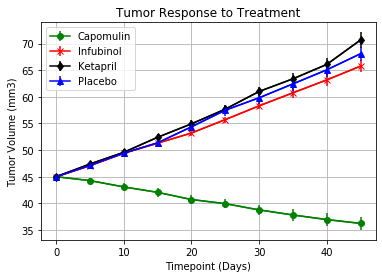

In [38]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()
mtv_df=mean_tumor_volume_df_pivot
stv_df=stem_tumor_volume_df_pivot

mtv_timepoint=mtv_df.index

i=0
for drug in drug_list:
    ax.errorbar(mtv_timepoint, mtv_df[drug], yerr=stv_df[drug], marker=markers[i], color=colors[i])
    i+=1
    
plt.legend(drug_list,loc="best")

i=0
for drug in drug_list:
    plt.plot(mtv_timepoint, mtv_df[drug], color=colors[i])
    i+=1

plt.title("Tumor Response to Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

# Save the Figure
plt.savefig('Tumor_Response_to_Treatment.png', dpi=300, format='png', bbox_inches='tight')
plt.show()


In [36]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_sites=drug_timepoint_group['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_sites_df=pd.DataFrame(mean_met_sites)
mean_met_sites_df=mean_met_sites_df.reset_index()

# Preview DataFrame
mean_met_sites_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [12]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
sem_met_sites=drug_timepoint_group['Metastatic Sites'].sem()

# Convert to DataFrame
sem_met_sites_df=pd.DataFrame(sem_met_sites)
sem_met_sites_df=sem_met_sites_df.reset_index()

# Preview DataFrame
sem_met_sites_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
# Minor Data Munging
mean_met_sites_df_pivot=mean_met_sites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
mean_met_sites_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [15]:
mean_met_sites_df_pivot.keys()

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')

In [16]:
# Reformatting Standard Error associated with Met. Sites Grouped by Drug and Timepoint
sem_met_sites_df_pivot=sem_met_sites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
sem_met_sites_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [17]:
mean_met_sites_df_pivot.index

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')

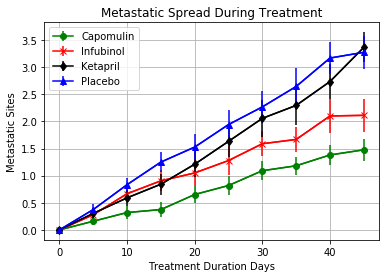

In [39]:
# Generate the Plot (with Error Bars)
fig, ax=plt.subplots()
mms_df=mean_met_sites_df_pivot
sms_df=sem_met_sites_df_pivot

mms_timepoint=mms_df.index

i=0
for drug in drug_list:
    ax.errorbar(mms_timepoint, mms_df[drug], yerr=sms_df[drug], marker=markers[i], color=colors[i])
    i+=1

plt.legend(drug_list,loc="best")

i=0
for drug in drug_list:
    plt.plot(mms_timepoint, mms_df[drug], color=colors[i])
    i+=1

plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration Days")
plt.ylabel("Metastatic Sites")
# Save the Figure
plt.savefig('Metastatic_Spread_During_Treatment.png', dpi=300, format='png', bbox_inches='tight')
# Show the Figure
plt.show()


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_cnt=drug_timepoint_group['Mouse ID'].count()
mice_cnt

# Convert to DataFrame
mice_cnt_df=pd.DataFrame(mice_cnt)
mice_cnt_df=mice_cnt_df.reset_index()

# Preview DataFrame
mice_cnt_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [20]:
# Minor Data Munging to Re-Format the Data Frames
mice_cnt_df_pivot=mice_cnt_df.pivot(index='Timepoint',columns='Drug',values='Mouse ID')

# Preview the Data Frame
mice_cnt_df_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


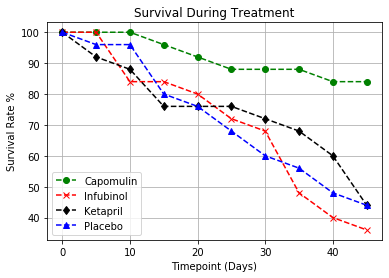

In [40]:
# Generate the Plot (Accounting for percentages)

mice_cnt_timepoint=mice_cnt_df_pivot.index
i=0
for drug in drug_list:
    plt.plot(mice_cnt_timepoint, (mice_cnt_df_pivot[drug]/mice_cnt_df_pivot[drug].max()*100), marker=markers[i], linestyle='--', color=colors[i])
    i+=1
    
plt.grid()
plt.legend(drug_list,loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Survival Rate %")
# Save the Figure
plt.savefig('Survival_During_Treatment.png', dpi=300, format='png', bbox_inches='tight')
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
# Display the data to confirm

print(mtv_df.index)
perc_change=(mtv_df.loc[45,drug_list]-mtv_df.loc[0,drug_list])/mtv_df.loc[0,drug_list]*100
print(perc_change)
perc_change_tuple=tuple(perc_change)
perc_change_tuple



Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')
Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64


(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)

('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
[0 1 2 3]
(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)


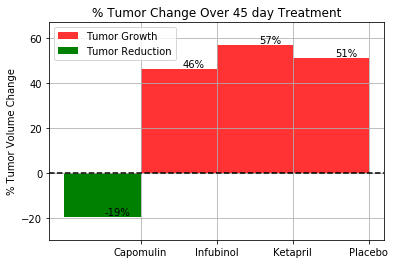

In [24]:
drug_tuple=tuple(drug_list)
print(drug_tuple)
objects = (drug_tuple)
y_pos = np.arange(len(objects))
print(y_pos)
performance = perc_change_tuple
print(performance)
plt.ylim(min(perc_change_tuple)-10,max(perc_change_tuple)+10)
for drug in range(len(drug_list)):
    if performance[drug] > 0:
        growth=plt.bar(y_pos[drug], performance[drug], color='r', align='edge', alpha=0.8, width=1)
    else:
        reduction=plt.bar(y_pos[drug], performance[drug], color='g', align='edge', alpha=1, width=1)
    plt.text(y_pos[drug]+0.7, performance[drug], '%d' % int(performance[drug])+'%', ha='center', va='bottom', color='black')

plt.grid()
plt.axhline(y=0, color = 'black', linestyle='--')
plt.xticks(y_pos+1, objects)
plt.ylabel('% Tumor Volume Change')
plt.title('% Tumor Change Over 45 day Treatment')
plt.legend((growth, reduction), ('Tumor Growth', 'Tumor Reduction'), loc="upper left")
plt.savefig('tumor_chg_over_45.png', dpi=300, format='png', bbox_inches='tight')
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)